In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Table of content:

## 1. Understanding the data:

* File opening
* Dimension and Data-types
* Check for Nullvalues : if present than perform imputation to handle null/missing values

## 2. Expolatory Data Analysis:

* Distribution of variables (mean, median, std)
* Relationship among different variables (correlation)
* Relationship of each variable w.r.t the target variable in the dataset.

## 3. Pre-Processing:

* Separate dependent variable and Independent variable
* Scaling of variables
* Handling Imbalanced Data
* Spliting Training and Testing data

## 5. Modeling:

* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* K-Nearest Neighbors


In [2]:
#Opening the csv file
df=pd.read_csv('data_cardiovascular_risk.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [3]:
#Dimension of dataset
print('This dataset contains {0} number of observation and {1} number of feature.'.format(df.shape[0],df.shape[1]))

This dataset contains 3390 number of observation and 17 number of feature.


In [4]:
#Understanding the data-type for each columns present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Above information suggests that all the fields, except "sex" and "is_smoking", are of numeric data type.

In [5]:
#Checking for Null values,if present we have to handle it by imputation
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [6]:
# Percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
education,87,2.566372
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


In [7]:
# 'Education' and 'ID' are two fields that are deemed irrelevant as they do not have any bearing on the occurrence of heart disease.

# So, Drop these features.

In [8]:
df.drop(columns=['education','id'],inplace=True)

In [9]:
# The remaining columns exhibit a minimal amount of missing data, so we proceed by removing those incomplete values.

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
df.shape

(3004, 15)

In [13]:
# Extracting Columns having Continuous data.
continuous_columns=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

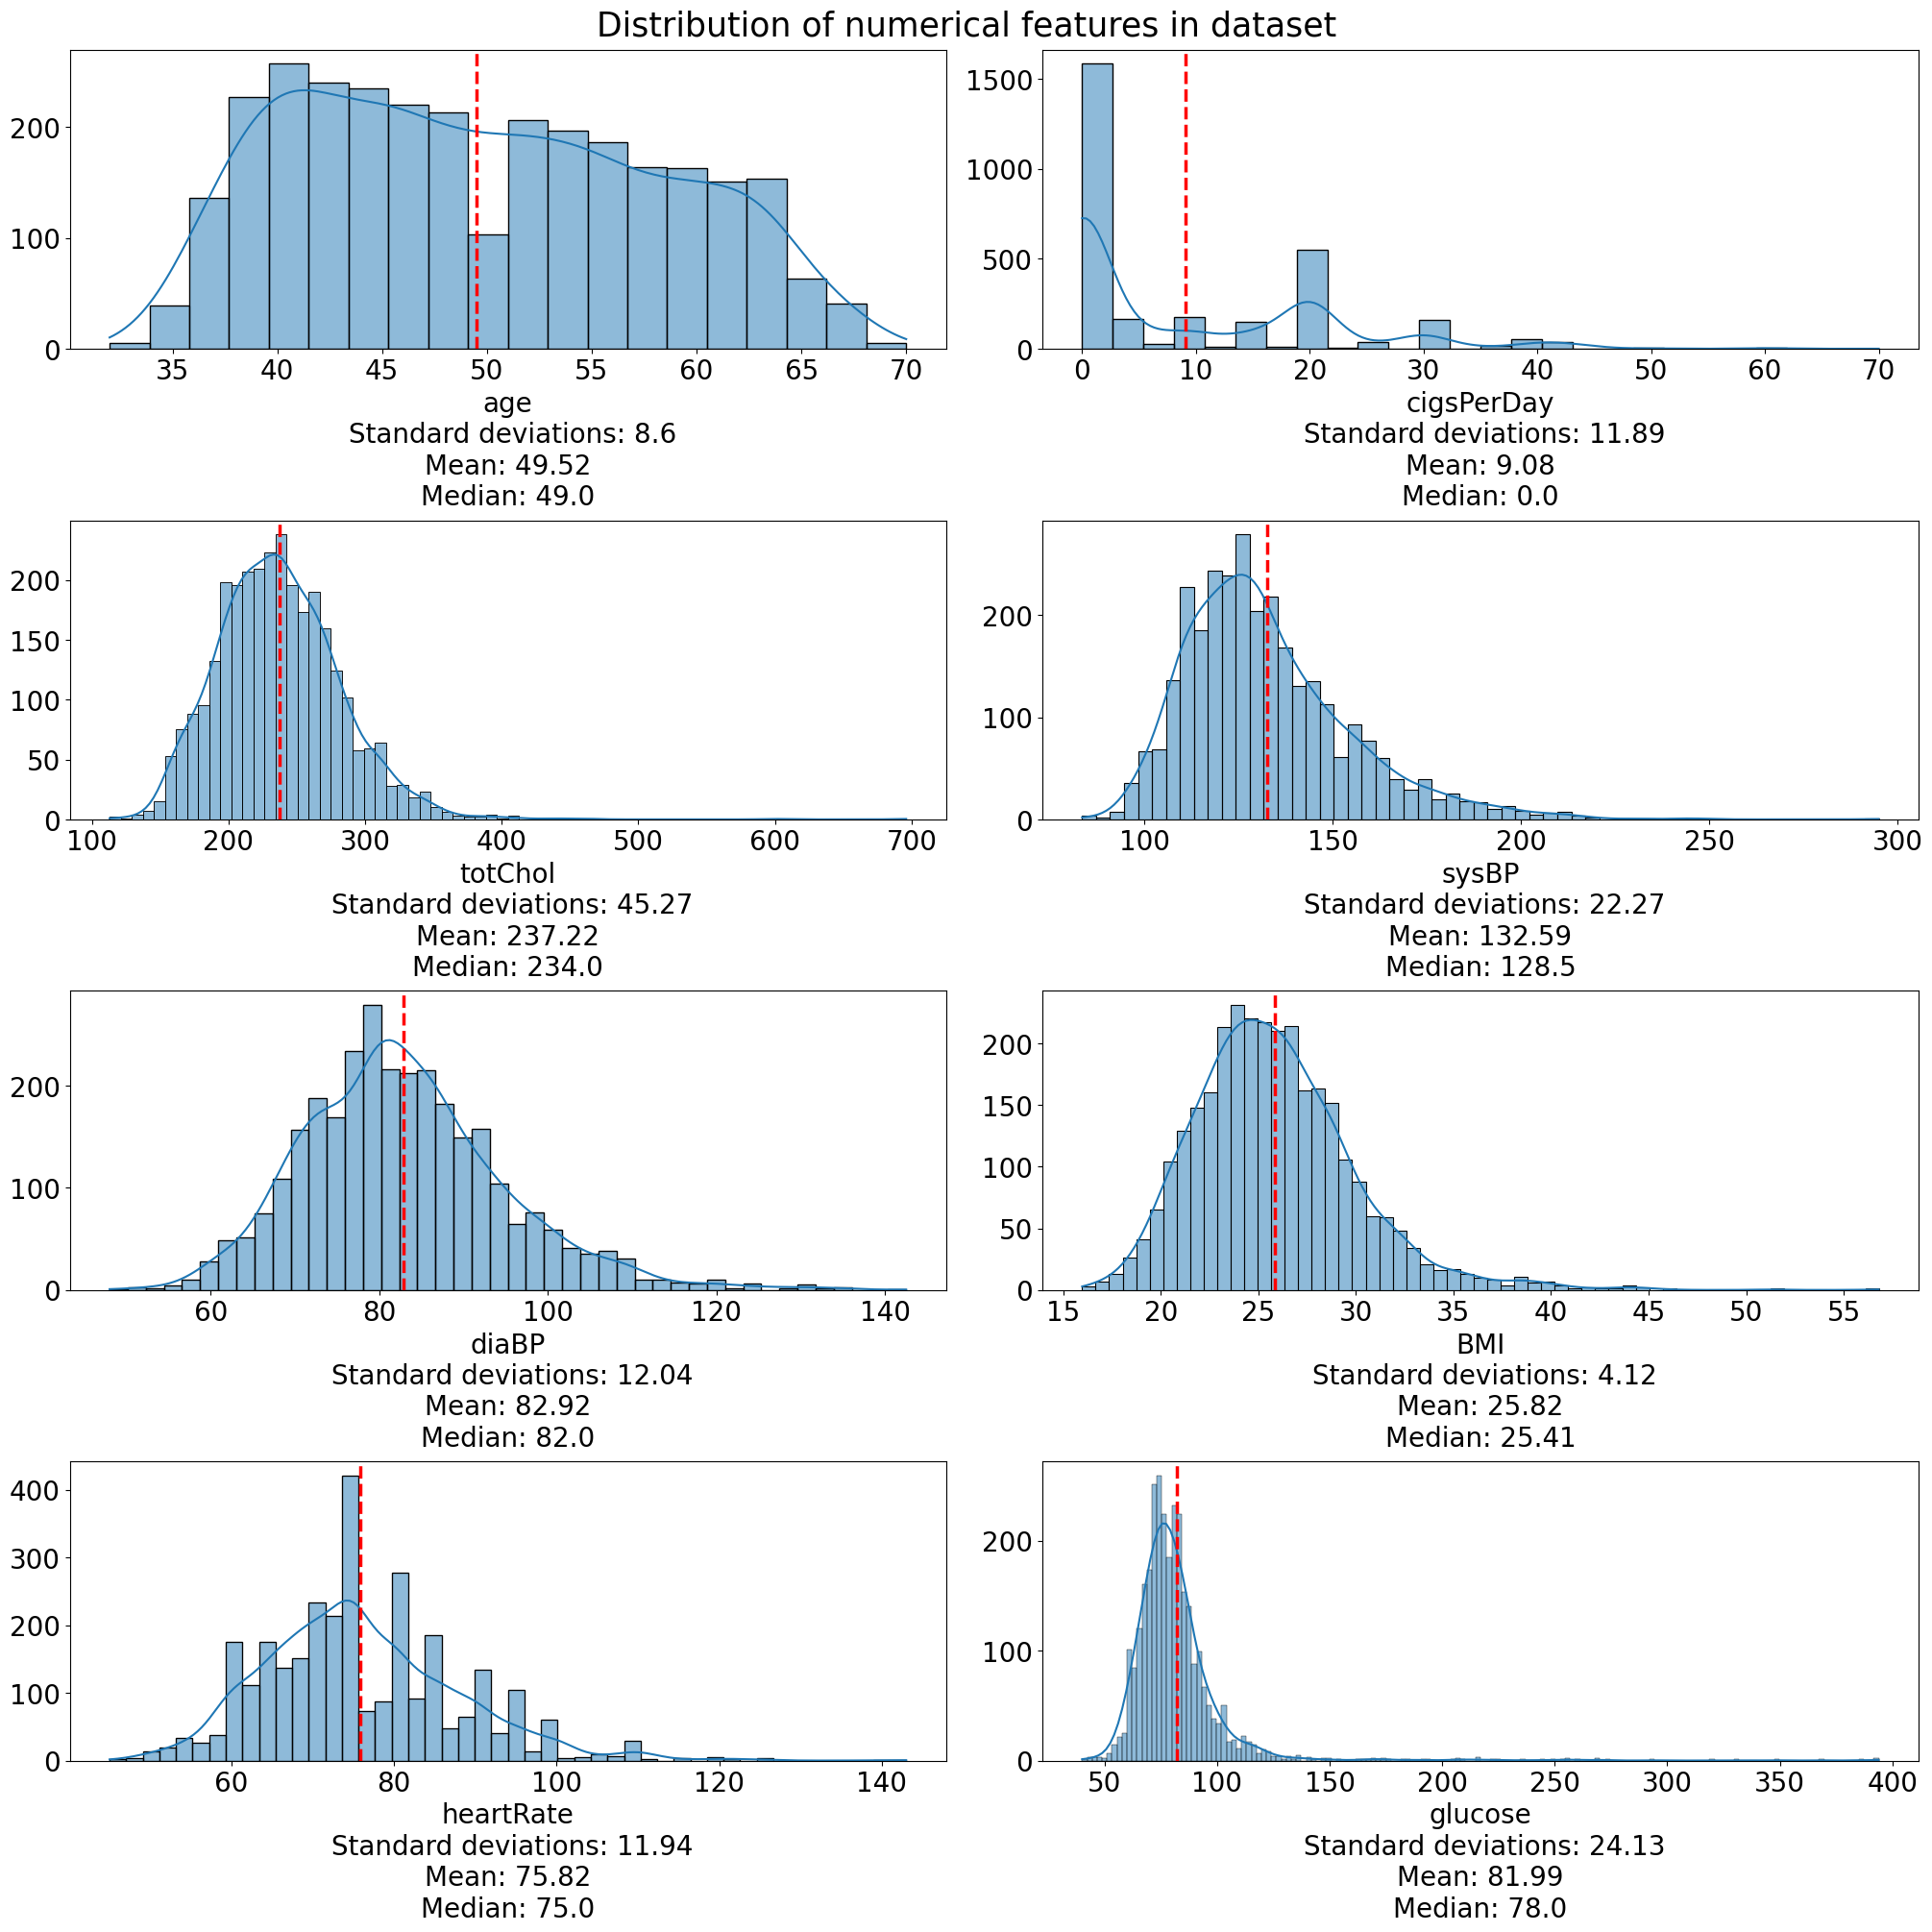

In [14]:
fig,ax=plt.subplots(4,2,constrained_layout=True)
fig.set_size_inches(20,20)
ax_list=[]
for m in range(4):
    for n in range(2):
        ax_list.append(ax[m,n])
    
for i in range(len(continuous_columns)):
    col=continuous_columns[i]
    sns.histplot(round(df[col],2),ax=ax_list[i],kde=True)
    ax_list[i].set_xlabel(col + '\n Standard deviations: ' + str(round(df[col].std(),2)) + '\nMean: ' + str(round(df[col].mean(),2)) +
                          '\nMedian: ' + str(round(df[col].median(),2)), size =20)
                                                                                                
    ax_list[i].set_ylabel('')
    ax_list[i].tick_params(axis='y',labelsize=20)
    ax_list[i].tick_params(axis='x',labelsize=20)
    ax_list[i].axvline(df[col].mean(),c='red',ls='--',lw=2.5)


fig.suptitle('Distribution of numerical features in dataset',size=25)
plt.show()

In [15]:
# Checking Correlation Coefficient between target variable and numeric features
for i in range(len(continuous_columns)):
    col=continuous_columns[i]
    corr=df['TenYearCHD'].corr(df[col])
    print(f"Correlation between Target Variable and {col} is: '\033[1m'{round(corr,4)}'\033[0m'")

Correlation between Target Variable and age is: ''0.2313''
Correlation between Target Variable and cigsPerDay is: ''0.0665''
Correlation between Target Variable and totChol is: ''0.1048''
Correlation between Target Variable and sysBP is: ''0.2137''
Correlation between Target Variable and diaBP is: ''0.1374''
Correlation between Target Variable and BMI is: ''0.0754''
Correlation between Target Variable and heartRate is: ''0.0216''
Correlation between Target Variable and glucose is: ''0.1346''


Text(0.5, 0.98, 'Correlation Matrix')

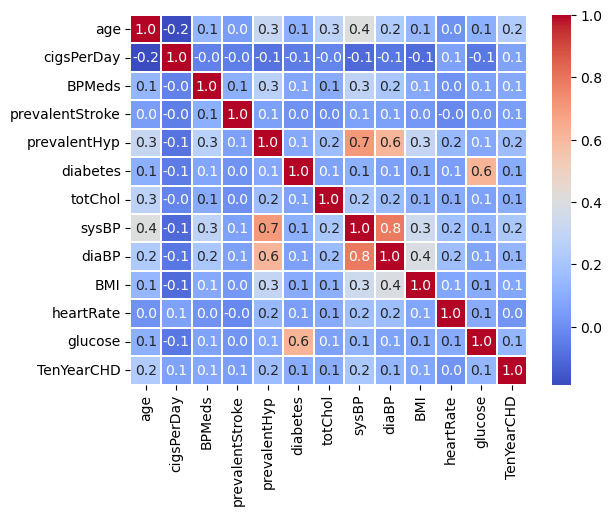

In [16]:
# Checking Correlation among the numerical features using correlation matrix


fig.set_size_inches(30,30)
sns.heatmap(df.corr(),linewidths=0.1,annot=True,cmap='coolwarm',fmt='0.001f')

fig.suptitle('Correlation Matrix',size=25)

In [17]:
# 'sysBP' is highly correlated with 'diaBP' and "prevalentHyp".
# 'diaBP' and 'prevalentHyp', 'diabetes' and 'glucose are' correlated to some extent with values around 0.6.

#### Creating an used defined function to calculare statistical summary of different fields.

In [18]:
def statistical_summary(col):
    x1=df[col][df['TenYearCHD']==1].describe()
    x2=df[col][df['TenYearCHD']==0].describe()
    df_sm=pd.concat([x1,x2],axis=1,keys=["1","0"])
    sns.histplot(data=df,x=col,hue='TenYearCHD')
    print(df_sm)

                1            0
count  457.000000  2547.000000
mean    54.214442    48.679230
std      8.138735     8.402926
min     35.000000    32.000000
25%     48.000000    42.000000
50%     55.000000    48.000000
75%     61.000000    55.000000
max     69.000000    70.000000


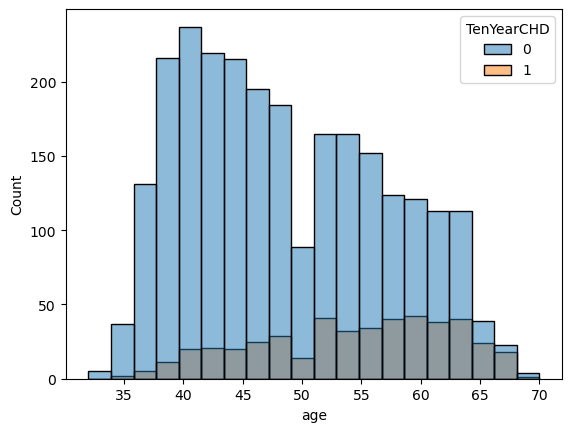

In [19]:
statistical_summary('age')

INSIGHTS:
The likelihood of developing coronary heart disease (CHD) increases significantly for individuals aged over 50, while those between the ages of 35 and 45 face a relatively lower risk.

                1            0
count  457.000000  2547.000000
mean    10.945295     8.743620
std     13.019186    11.648012
min      0.000000     0.000000
25%      0.000000     0.000000
50%      5.000000     0.000000
75%     20.000000    20.000000
max     60.000000    70.000000


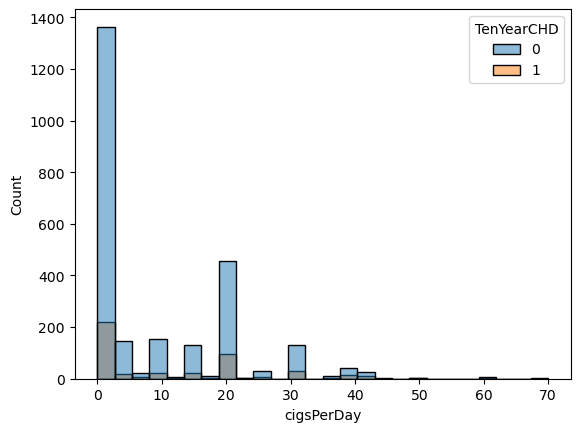

In [20]:
statistical_summary('cigsPerDay')

INSIGHTS:
Many individuals who do not smoke are at risk of developing coronary heart disease (CHD).

                1            0
count  457.000000  2547.000000
mean   248.415755   235.213977
std     49.548200    44.167113
min    124.000000   113.000000
25%    215.000000   205.000000
50%    244.000000   232.000000
75%    273.000000   262.000000
max    600.000000   696.000000


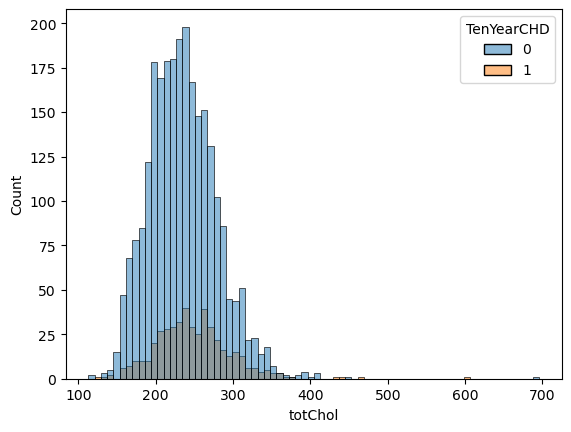

In [21]:
statistical_summary('totChol')

INSIGHTS:

The average cholesterol level among individuals at risk of CHD is slightly higher than that of those without risk. This indicates that a higher cholesterol level is associated with an increased likelihood of developing CHD.
    

                1            0
count  457.000000  2547.000000
mean   143.823851   130.576364
std     27.082155    20.662761
min     83.500000    83.500000
25%    125.000000   116.000000
50%    139.000000   127.500000
75%    158.000000   141.000000
max    295.000000   243.000000


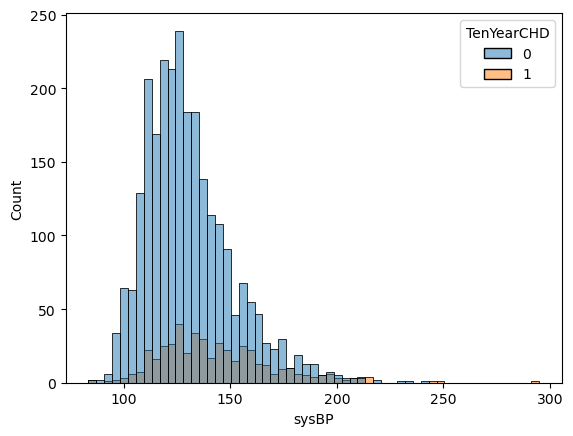

In [22]:
statistical_summary('sysBP')

INSIGHTS:
Higher the systolic blood pressure, higher the risk of CHD.
    

                1            0
count  457.000000  2547.000000
mean    86.827133    82.222615
std     14.314094    11.446000
min     48.000000    52.000000
25%     78.000000    74.000000
50%     85.000000    81.000000
75%     95.000000    88.500000
max    135.000000   142.500000


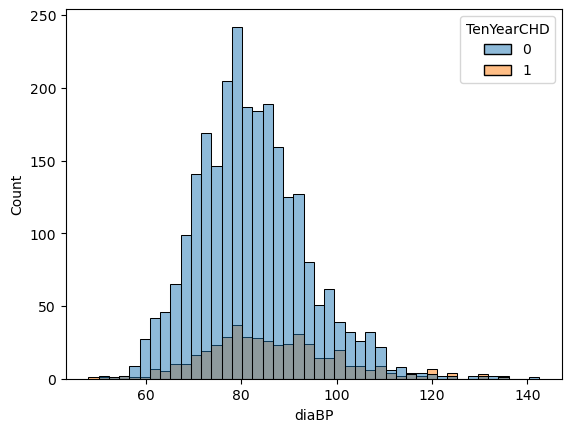

In [23]:
statistical_summary('diaBP')

INSIGHTS:
Higher the diastolic blood pressure, higher the risk of CHD.

                1            0
count  457.000000  2547.000000
mean    26.557243    25.692485
std      4.651066     4.005493
min     15.960000    16.480000
25%     23.380000    22.980000
50%     26.210000    25.250000
75%     29.070000    27.910000
max     56.800000    51.280000


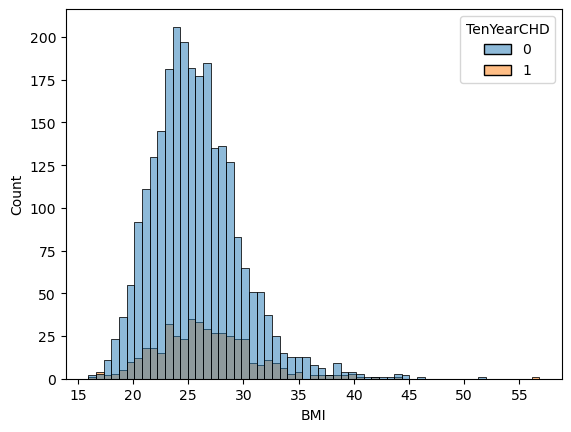

In [24]:
statistical_summary('BMI')

                1            0
count  457.000000  2547.000000
mean    76.424508    75.707892
std     12.093173    11.908011
min     50.000000    45.000000
25%     68.000000    68.000000
50%     75.000000    75.000000
75%     84.000000    83.000000
max    120.000000   143.000000


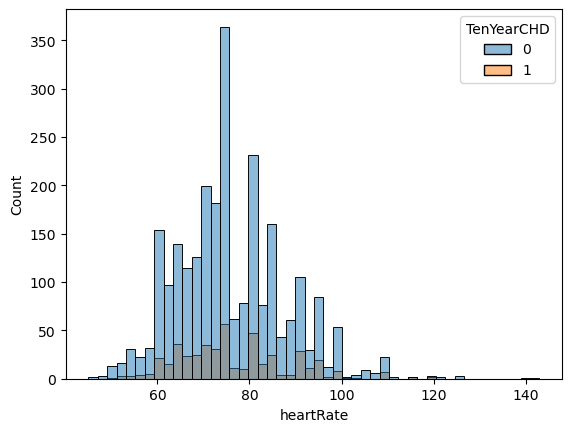

In [25]:
statistical_summary('heartRate')

                1            0
count  457.000000  2547.000000
mean    89.656455    80.617982
std     41.852002    18.983717
min     45.000000    40.000000
25%     72.000000    71.000000
50%     79.000000    78.000000
75%     92.000000    86.000000
max    394.000000   386.000000


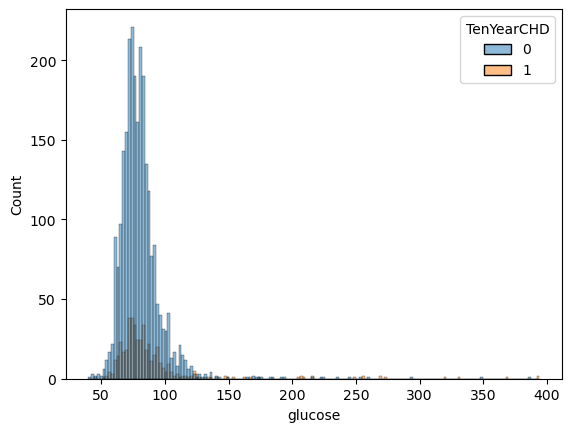

In [26]:
statistical_summary('glucose')

Glucose Level in risk prone patient is much higher than those without risk.

#### Creating used defined function to draw countplot for discreet columns.

In [27]:
def count_plot(col):
    sns.countplot(x=df['TenYearCHD'],hue=df[col])

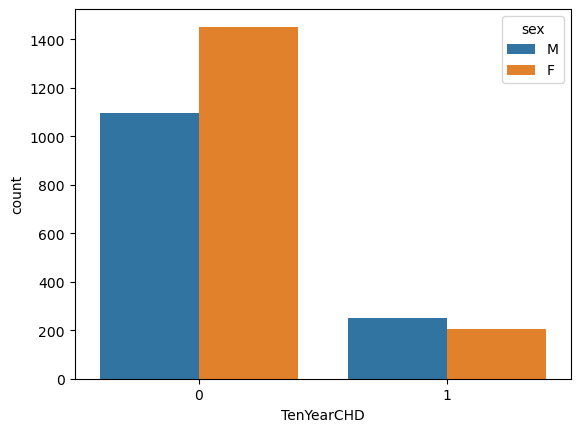

In [28]:
count_plot('sex')

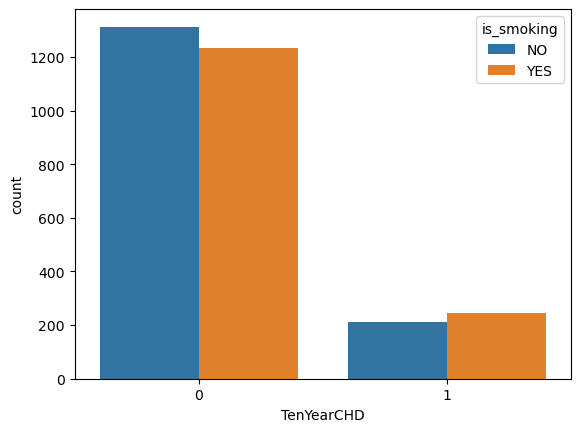

In [29]:
count_plot('is_smoking')

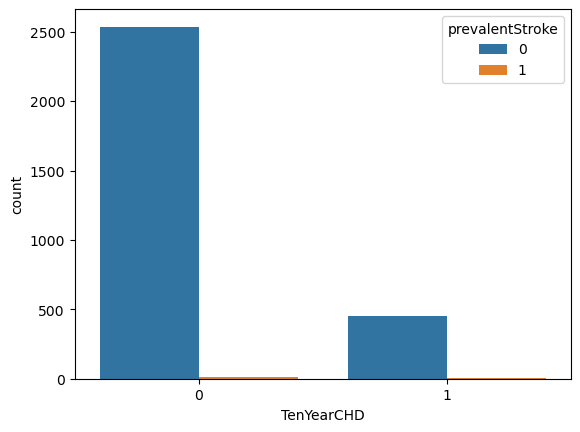

In [30]:
count_plot('prevalentStroke')

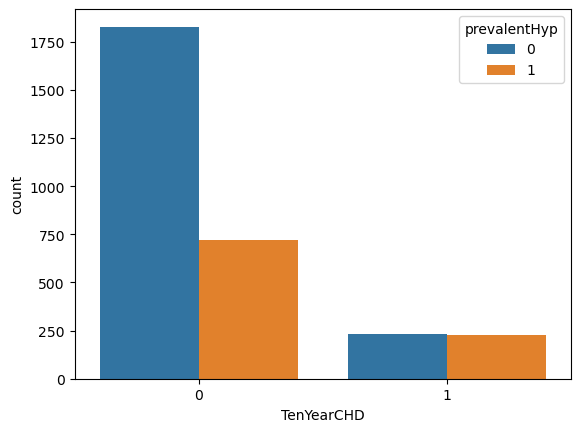

In [31]:
count_plot('prevalentHyp')

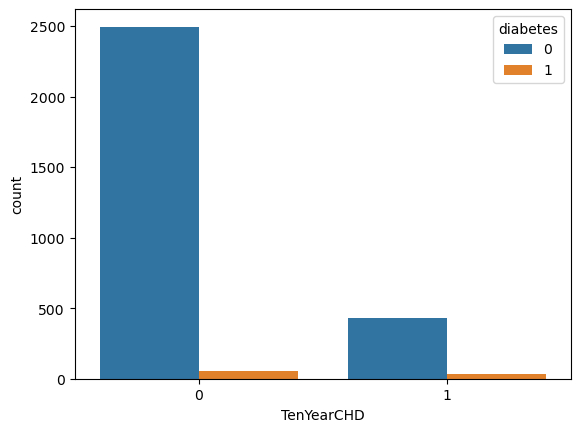

In [32]:
count_plot('diabetes')

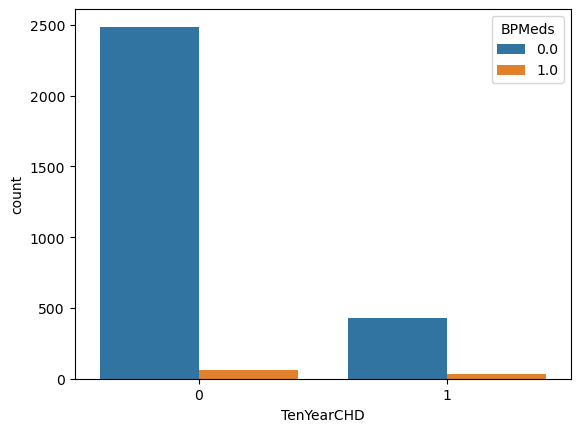

In [33]:
count_plot('BPMeds')

In [34]:
le = LabelEncoder() # Lable Encoding to convert non-numeric data to numeric data
df['sex'] = le.fit_transform(df['sex'])
df['is_smoking'] = le.fit_transform(df['is_smoking'])

In [35]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [36]:
# Checking Imbalance in dataset.

In [37]:
df['TenYearCHD'].value_counts()

0    2547
1     457
Name: TenYearCHD, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

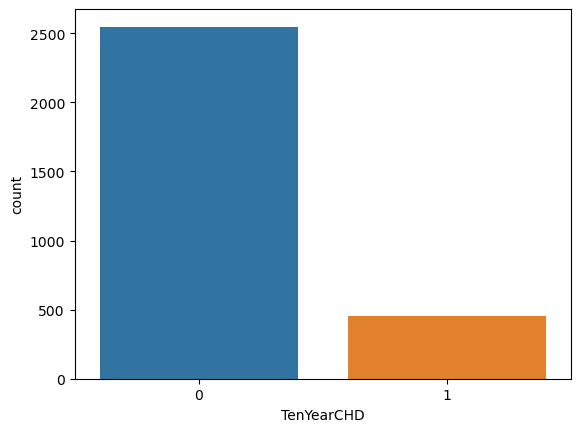

In [38]:
sns.countplot(x=df['TenYearCHD'])

In [39]:
# Evidently, there is a significant disparity in the quantity of data among each category.
# We need to balance by upsampling the minority calss.

In [40]:
#create two different dataframe of majority and minority class 
df_majority = df[(df['TenYearCHD']==0)] 
df_minority = df[(df['TenYearCHD']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2547, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [41]:
# Splitting Dependent and Independent features and storing then in different variables.
x=df_upsampled.drop(columns=['TenYearCHD'])
y=df_upsampled['TenYearCHD']

In [42]:
y.value_counts()

1    2547
0    2547
Name: TenYearCHD, dtype: int64

In [43]:
#Splitting Training and Testing Data in the ratio 80:20
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=17)

In [44]:
# Scaling the data using Standard Scaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

#### Creating a user defined function to calculate Performance Score for different Models.

In [45]:
def evaluation_score(model_name,y_true,y_pred):
    print("Model Evaluation Score:")
    print()
    acc = accuracy_score(y_true, y_pred)
    print(f"The Accuracy score for {model_name} is: {round(acc,3)*100}%") # Accuracy Score
    print()
    precision = precision_score(y_true, y_pred)
    print(f"The Precision score for {model_name} is: {round(precision,3)*100}%") # Precision Score
    print()
    recall = recall_score(y_true, y_pred)
    print(f"The Recall score for {model_name} is: {round(recall,3)*100}%") # Recall Score
    print()
    f1 = f1_score(y_true, y_pred)
    print(f"The F-1 score for {model_name} is: {round(f1,3)*100}%") # F-1 Score

#### Creating a user defined function for confusion matrix.

In [46]:
def confusion_mat(model_name,y_true,y_pred):
    cm=confusion_matrix(y_true,y_pred)
    print(f"Confusion Matric for {model_name} : ")
    cm_display =ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    plt.show()

# Modelling

#### 1. Logistic Regression

In [47]:
model_LR=LogisticRegression()  # Creating an object of Logistic Regression.
model_LR.fit(X_train,y_train)  # Fitting training data to the model.

LogisticRegression()

In [48]:
y_train_pred_LR=model_LR.predict(X_train)
y_test_pred_LR=model_LR.predict(X_test)

In [49]:
# Checking Training score
print(f'Training Accuracy for Logistic Regression is {round(((accuracy_score(y_train,y_train_pred_LR))*100),2)}%') 

Training Accuracy for Logistic Regression is 66.63%


In [50]:
evaluation_score('Logistic Regression',y_test,y_test_pred_LR) # Performance Matrix for Logistic Regression

Model Evaluation Score:

The Accuracy score for Logistic Regression is: 64.7%

The Precision score for Logistic Regression is: 64.60000000000001%

The Recall score for Logistic Regression is: 63.1%

The F-1 score for Logistic Regression is: 63.9%


Confusion Matric for Logistic Regression : 


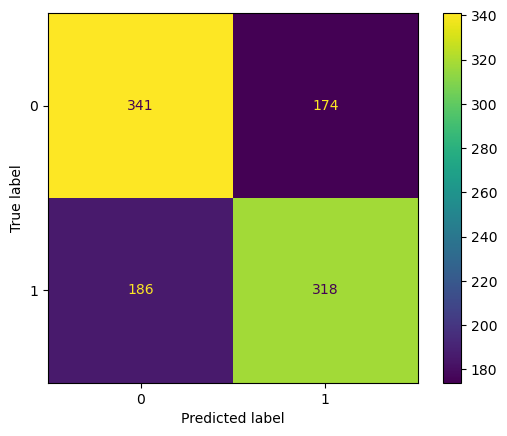

In [51]:
confusion_mat('Logistic Regression',y_test,y_test_pred_LR) # Confusion Matrix for Logistic Regression Model.

Logistic Regression is employed as a foundational model to gauge the intricacy of the dataset. Although the model achieved an accuracy of 64.7%, which may appear moderate, it is important to note that it failed to correctly predict the risk 186 times out of 504 instances. This particular shortcoming renders the model unreliable

#### 2. Decision Tree Classifier

In [52]:
model_dt= DecisionTreeClassifier(max_depth=10,min_samples_split=4,min_samples_leaf=4) # Creating an object of decision tree classifier with some parameter tunning.
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4)

In [53]:
y_train_pred_dt=model_dt.predict(X_train)
y_test_pred_dt=model_dt.predict(X_test)

In [54]:
# Checking Training score
print(f'Training Accuracy for Decision Tree Classifier is {round(((accuracy_score(y_train,y_train_pred_dt))*100),2)}%') 

Training Accuracy for Decision Tree Classifier is 86.53%


In [56]:
evaluation_score('Decision Tree Classifier',y_test,y_test_pred_dt) # Performance Matrix for Decision Tree Classifier Model.

Model Evaluation Score:

The Accuracy score for Decision Tree Classifier is: 79.5%

The Precision score for Decision Tree Classifier is: 75.7%

The Recall score for Decision Tree Classifier is: 86.1%

The F-1 score for Decision Tree Classifier is: 80.60000000000001%


Confusion Matric for Decision Tree : 


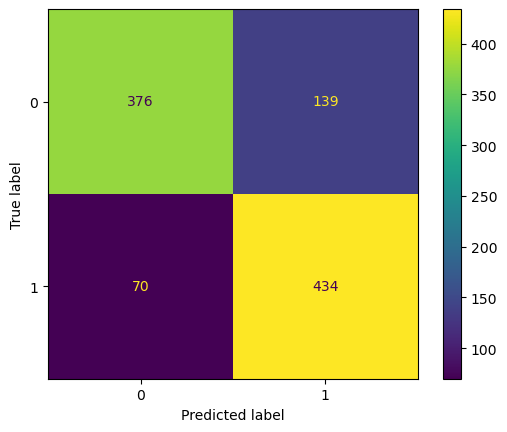

In [58]:
confusion_mat('Decision Tree',y_test,y_test_pred_dt) # Confusion Matric for Decision Tree Classifier Model

A decision tree is utilized in this context due to its ability to capture non-linear associations between features and the target variable. After some hyperparameter tuning, this model attained an accuracy of 80%. Nonetheless, it's worth noting that the training accuracy reached 86%, indicating a notable variance within the model.

#### 3. Random Forest Classifier

In [59]:
model_RF=RandomForestClassifier(n_estimators=300)
model_RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [61]:
y_train_pred_RF=model_RF.predict(X_train)
y_test_pred_RF=model_RF.predict(X_test)

In [62]:
# Checking Training score
print(f'Training Accuracy for Random Forest Classifier is {round(((accuracy_score(y_train,y_train_pred_RF))*100),2)}%') 

Training Accuracy for Random Forest Classifier is 100.0%


In [63]:
evaluation_score('Random Forest Classifier',y_test,y_test_pred_RF)

Model Evaluation Score:

The Accuracy score for Random Forest Classifier is: 97.7%

The Precision score for Random Forest Classifier is: 95.8%

The Recall score for Random Forest Classifier is: 99.8%

The F-1 score for Random Forest Classifier is: 97.8%


Confusion Matric for Random Forest Classifier : 


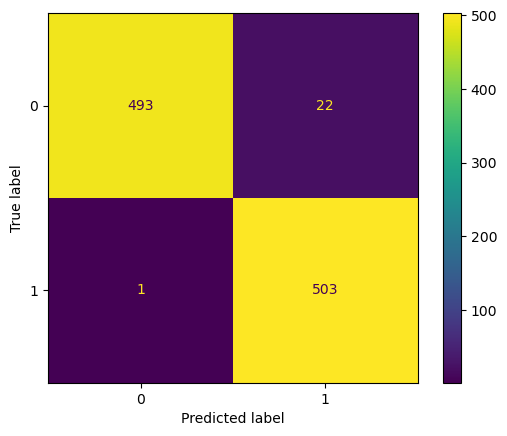

In [64]:
confusion_mat('Random Forest Classifier',y_test,y_test_pred_RF)

The Random Forest Classifier is employed to address the issue of overfitting commonly encountered with the Decision Tree Classifier. Furthermore, it offers increased reliability by leveraging ensemble learning, which involves aggregating predictions from numerous decision trees. This ensemble strategy not only improves predictive accuracy but also mitigates the risk of overfitting.
The model achieved an impressive accuracy of 98%, signifying its exceptional performance. Notably, it accurately predicted all risk instances, demonstrating its effectiveness in risk identification.

### Finding Important Features using Random Forest Model

In [65]:
cols=df.columns

In [66]:
cls=cols[0:14]

In [67]:
cls

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

In [68]:
X_t = pd.DataFrame(X_train, columns=[cls])

In [69]:
feature_scores = pd.Series(model_RF.feature_importances_, index=X_t.columns).sort_values(ascending=False)

feature_scores

age                0.153250
sysBP              0.138847
BMI                0.126753
totChol            0.126672
glucose            0.117709
diaBP              0.115962
heartRate          0.099581
cigsPerDay         0.051254
sex                0.025680
prevalentHyp       0.020270
is_smoking         0.012128
BPMeds             0.005385
diabetes           0.004549
prevalentStroke    0.001961
dtype: float64

#### 4. K-Nearest Neighbors

In [70]:
model_KNN=KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
y_train_pred_KNN=model_KNN.predict(X_train)
y_test_pred_KNN=model_KNN.predict(X_test)

In [72]:
# Checking Training score
print(f'Training Accuracy for KNN Classifier is {round(((accuracy_score(y_train,y_train_pred_KNN))*100),2)}%') 

Training Accuracy for KNN Classifier is 92.93%


In [73]:
evaluation_score('KNN',y_test,y_test_pred_KNN)

Model Evaluation Score:

The Accuracy score for KNN is: 85.9%

The Precision score for KNN is: 79.10000000000001%

The Recall score for KNN is: 97.0%

The F-1 score for KNN is: 87.2%


Confusion Matric for K-Nearest Neighbors : 


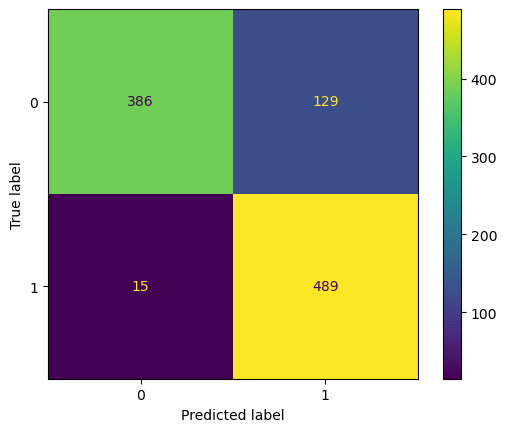

In [74]:
confusion_mat('K-Nearest Neighbors',y_test,y_test_pred_KNN)

The idea behind use of KNN is to employee a distance based algorithm. Also, the dataset is small which make KNN suitable . It is sensitive to the choice of number of neighbors(k),k=5 used here in the model. It achieved ~86% accuracy and also very good in predicting the risk correctly.

# Comparing Models

In [75]:
data = {'Model':['Logistic Regression','Decision Tree','Random Forest','KNN'],
        'Accuracy':[64.7,79.4,98.0,85.9],
        'Precision':[64.6,75.6,96.4,79.1],
        'Recall':[63.1,86.1,99.8,97.0],
        'F1 Score':[63.9,80.5,98.1,87.2]}

# Create DataFrame
model_compare = pd.DataFrame(data)
 
# Print the output.
print(model_compare)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression      64.7       64.6    63.1      63.9
1        Decision Tree      79.4       75.6    86.1      80.5
2        Random Forest      98.0       96.4    99.8      98.1
3                  KNN      85.9       79.1    97.0      87.2


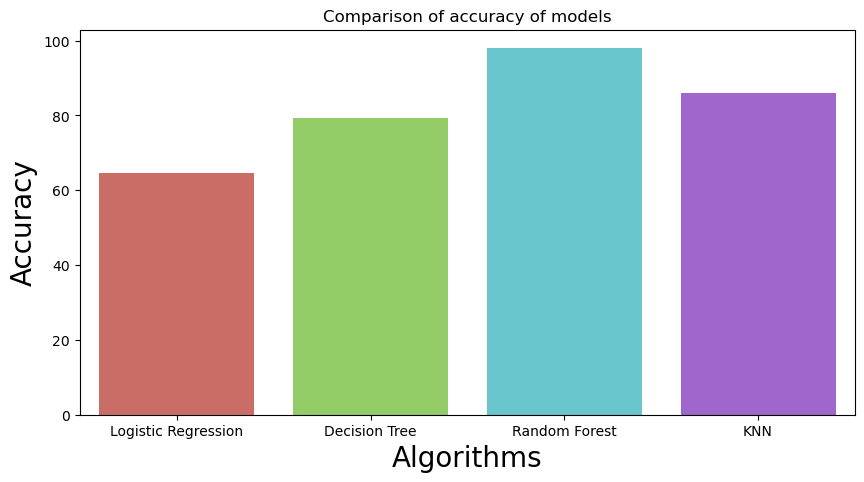

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data = model_compare, color = 'blue', palette = 'hls')
plt.title('Comparison of accuracy of models')
plt.xlabel('Algorithms', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.show()

The logistic regression model, while offering a reasonable start, achieved a 65% accuracy rate. It provided a foundation for further exploration but fell short of providing the desired precision.
The Decision Tree Classifier exhibited an improvement, achieving a 76% accuracy rate. Its ability to capture complex relationships among key features contributed to better risk prediction.
K-Nearest Neighbors (KNN) significantly enhanced our predictive capabilities, achieving an 86% accuracy rate. Its strength in identifying patterns based on proximity to neighboring data points proved beneficial in CHD risk assessment.
However, the standout performer in our project was the Random Forest Classifier, achieving an impressive 98% accuracy rate.

In [77]:
pred_prob1 = model_LR.predict_proba(X_test)[:, 1]
pred_prob2 = model_dt.predict_proba(X_test)[:, 1]
pred_prob3 = model_RF.predict_proba(X_test)[:, 1]
pred_prob4 = model_KNN.predict_proba(X_test)[:, 1]

In [78]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, pred_prob1)
roc_auc_lr = auc(fpr_lr, tpr_lr)

In [79]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, pred_prob2)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [80]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, pred_prob3)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [81]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, pred_prob4)
roc_auc_knn = auc(fpr_knn, tpr_knn)

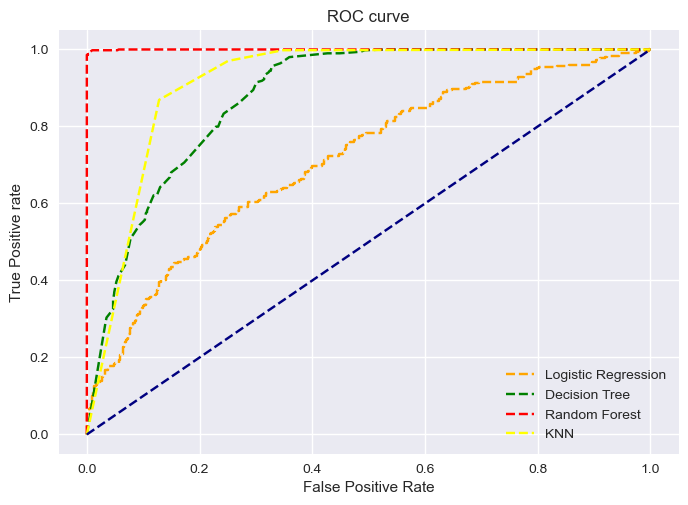

In [82]:

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='yellow', label='KNN')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

These results underscore the critical importance of selecting the right machine learning algorithm for the task at hand. In our case, Random Forest not only demonstrated its superiority but also highlighted the significance of the identified risk factors. Age, Systolic BP, Total Cholesterol, BMI, Glucose levels, diastolic BP, Heart Rate, Cigarettes per day, and Sex emerged as the most influential factors affecting CHD risk.

# End of Code

In [19]:
list1=[1,2,3,4]

In [20]:
rev=[]

In [17]:
for i in range(1,len(list1)+1):
    a=list1[-i]
    rev.append(a)

In [18]:
rev

[list[-1], list[-1], list[-1], 4, 4, 4, 4, 3, 2, 4, 3, 2, 1]

In [12]:
list1[-1]

4

In [21]:
for i in list1:
    rev.insert(0,i)
    
print(rev)

[4, 3, 2, 1]
